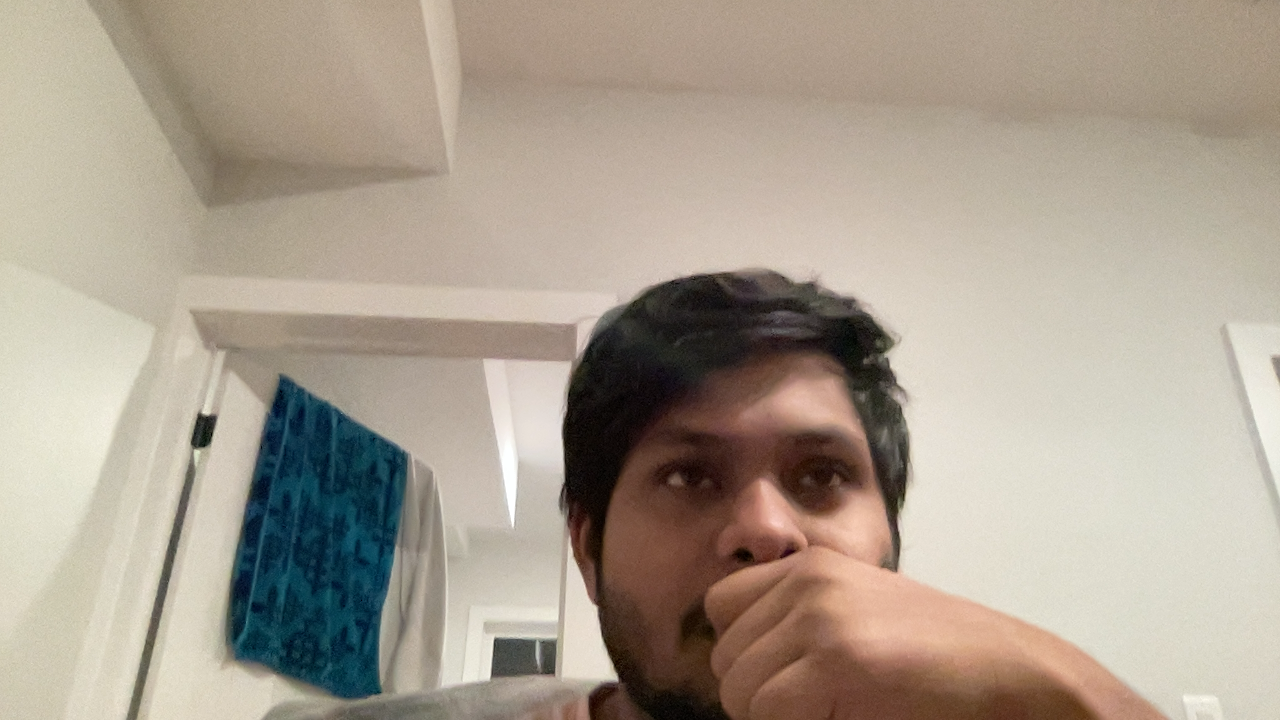

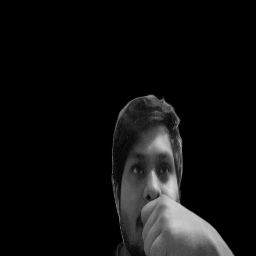

Image captured, background removed, and preprocessed.


In [8]:
import cv2
import rembg
from PIL import Image
import numpy as np
import random
from IPython.display import Image as IPImage, display

# Function to capture an image from the default camera, remove the background, and preprocess it
def capture_and_preprocess():
    # Open the default camera (camera index 0)
    cap = cv2.VideoCapture(0)

    # Allow the camera to adjust (you may need to adjust the delay based on your camera)
    cv2.waitKey(1000)

    # Read a frame from the camera
    ret, frame = cap.read()

    # Release the camera capture
    cap.release()

    if ret:
        # Convert the OpenCV frame to a PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Use rembg to remove the background
        with rembg.remove(pil_image) as result:
            # Convert the result to an OpenCV format
            sign = cv2.cvtColor(np.array(result), cv2.COLOR_RGBA2BGRA)

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(sign, cv2.COLOR_BGRA2GRAY)

        # Resize the image to the target size (256x256)
        target_size = (256, 256)
        resized_image = cv2.resize(grayscale_image, target_size)

        # Remove random noise (salt and pepper noise)
        noisy_image = Image.fromarray(resized_image)
        noisy_image = noisy_image.point(lambda p: p + random.choice([-50, 0, 50]) if random.random() < 0.05 else p)

        # Convert the noisy image back to NumPy array
        noisy_image_np = np.array(noisy_image)

        return frame, noisy_image_np
    else:
        print("Failed to capture an image.")
        return None



# Capture an image, remove the background, and preprocess it
input_image, preprocessed_image = capture_and_preprocess()

# Check if the preprocessed image was successfully captured
if preprocessed_image is not None:
    # Display the input image
    display(IPImage(data=cv2.imencode('.png', input_image)[1].tobytes(), format='png'))

    # Display the preprocessed image
    display(IPImage(data=cv2.imencode('.png', preprocessed_image)[1].tobytes(), format='png'))

    print("Image captured, background removed, and preprocessed.")
else:
    print("Image capture failed.")
